In [7]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

In [8]:
def newton_complex(z0, tol=1e-12, max_iter=100):
    def g(z):  return z**3 - 1
    def gp(z): return 3*z**2

    z = complex(z0)
    path = [z]
    for n in range(max_iter):
        if abs(g(z)) < tol:
            return z, n, path
        # Avoiding division per zero
        if abs(gp(z)) == 0:
            z += 1e-12 + 1e-12j
        z = z - g(z)/gp(z)
        path.append(z)
    return z, max_iter, path


In [9]:
# Real zeros
roots_true = np.array([
    1 + 0j,
    np.exp(2j*np.pi/3), # -1/2 + i*sqrt(3)/2
    np.exp(4j*np.pi/3), # -1/2 - i*sqrt(3)/2
])

def which_root(z, roots=roots_true, tol=1e-6):
    # Index of zeros more close o -1 if it is not neighbour to nothing
    d = np.abs(z - roots)
    k = int(np.argmin(d))
    return k if d[k] < tol else -1

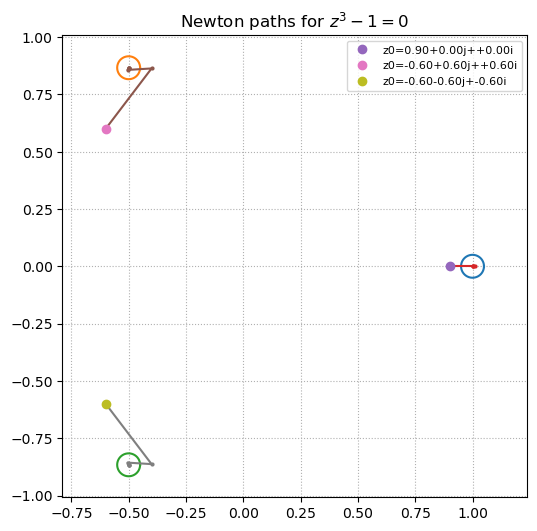

z0=0.900+0.000j, converged to root #0 ≈ 1+0j in 4 iterations
z0=-0.600+0.600j, converged to root #1 ≈ -0.5+0.866025403784j in 5 iterations
z0=-0.600-0.600j, converged to root #2 ≈ -0.5-0.866025403784j in 5 iterations


In [10]:
inits = [0.9+0j, -0.6+0.6j, -0.6-0.6j]  # three different points
converged = []

plt.figure(figsize=(6,6))
θ = np.linspace(0, 2*np.pi, 400)
# circles over real zeros
for r in roots_true:
    plt.plot(r.real + 0.05*np.cos(θ), r.imag + 0.05*np.sin(θ))

for z0 in inits:
    z, n, path = newton_complex(z0)
    converged.append((z0, z, n))
    path = np.array(path)
    plt.plot(path.real, path.imag, marker='o', ms=2)
    plt.plot([z0.real], [z0.imag], 'o', label=f'z0={z0:.2f}+{z0.imag:+.2f}i')

plt.axis('equal')
plt.grid(True, ls=':')
plt.title('Newton paths for $z^3-1=0$')
plt.legend(loc='best', fontsize=8)
plt.show()

for z0, z, n in converged:
    k = which_root(z)
    print(f"z0={z0:.3f}, converged to root #{k} ≈ {z:.12g} in {n} iterations")

In [11]:
def basin_newton(xmin=-1, xmax=1, ymin=-1, ymax=1, N=600, 
                 tol=1e-6, max_iter=50):
    # Calculate for every z0 of the grid: 
    # - root_idx which is the index 0,1,2 of the found root, -1 if no convergence
    # - iters which is the number of iterations
    xs = np.linspace(xmin, xmax, N)
    ys = np.linspace(ymin, ymax, N)
    root_idx = np.full((N, N), -1, dtype=int)
    iters = np.zeros((N, N), dtype=int)

    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            z, n, _ = newton_complex(x + 1j*y, tol=tol, max_iter=max_iter)
            root_idx[i, j] = which_root(z, tol=tol)
            iters[i, j] = n
    return xs, ys, root_idx, iters

xs, ys, root_idx, iters = basin_newton(-1, 1, -1, 1, N=500, tol=1e-8, max_iter=80)

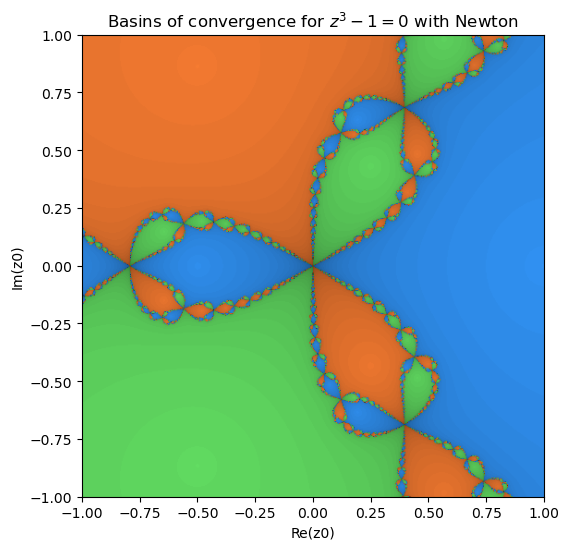

In [12]:
colors = np.array([
    [0.2, 0.6, 1.0],  # blu
    [1.0, 0.5, 0.2],  # orange
    [0.4, 0.9, 0.4],  # green
    [0.0, 0.0, 0.0],  # no-convergence, black
])

N = root_idx.shape[0]
rgb = np.zeros((N, N, 3), dtype=float)

max_it = max(1, iters.max())
norm_iters = iters / max_it # 0..1

for i in range(N):
    for j in range(N):
        k = root_idx[i, j]
        base = colors[k] if k >= 0 else colors[3]
        shade = 0.25 + 0.75*(1 - norm_iters[i, j])
        rgb[i, j] = np.clip(base * shade, 0, 1)

plt.figure(figsize=(6,6))
plt.imshow(rgb, extent=[xs[0], xs[-1], ys[0], ys[-1]], origin='lower')
plt.xlabel('Re(z0)')
plt.ylabel('Im(z0)')
plt.title('Basins of convergence for $z^3-1=0$ with Newton')
plt.grid(False)
plt.show()
